In [ ]:
import pandas as pd

pop = pd.read_csv('../../grenenet_cleaning/grenenet/pop_size_estimations.csv')

climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

pop = pop.merge(climate, on ='site')

pop['site_plot'] = pop['site'].astype(str) + '_' + pop['plot'].astype(str)

bio1 = pop[['site_plot', 'bio1']]

bio1 = bio1.drop_duplicates().set_index('site_plot')

pop_pivot = pop.pivot_table(index = 'site_plot', columns = 'generation', values = 'totalplantnumber_complete')

pop_pivot = pop_pivot[[1,2,3]]

pop_pivot

In [11]:
#pop_pivot[[1, 2, 3]] = pop_pivot[[1, 2, 3]].fillna(method='ffill', axis=1)

In [12]:
# Merge the two dataframes on the index
merged_df = pop_pivot.join(bio1)

# Group by temperature (bio1)
bio1_groups = merged_df.groupby('bio1')

In [13]:
merged_df

,1,2,3,bio1
site_plot,,,,
10_1,20.022046,76.024195,NaN,20.550923
10_10,27.816165,NaN,94.001247,20.550923
10_11,22.539866,NaN,NaN,20.550923
10_12,14.278739,NaN,NaN,20.550923
10_2,22.539866,53.751287,107.929843,20.550923
...,...,...,...,...
9_5,78.333333,7.868034,8.548902,12.481669
9_6,86.333333,9.158410,10.811135,12.481669
9_7,87.666667,5.366662,67.658663,12.481669


In [14]:
climate_dict = climate.set_index('bio1')['site'].to_dict()

In [15]:
colors = ['#2aad2a' , '#2aad2a', '#208420'] # 

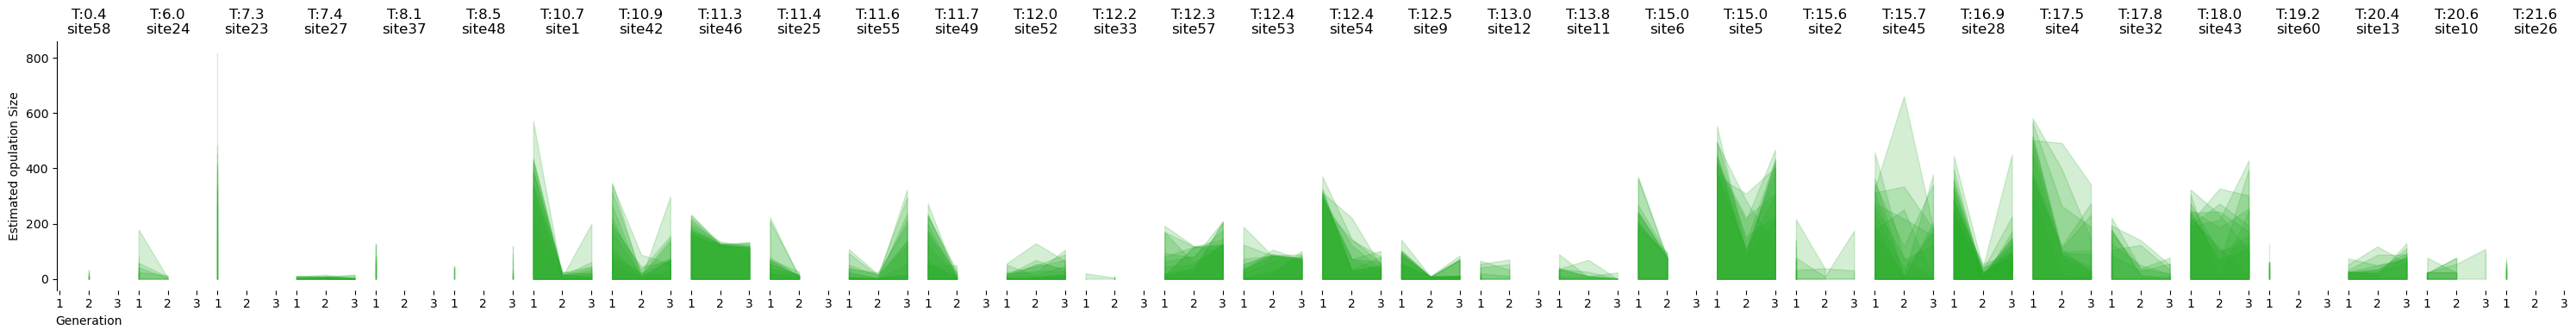

In [16]:
import matplotlib.pyplot as plt

# Set the number of columns for the plot grid
n_cols = len(bio1_groups)
n_rows = 1

# Create subplots with multiple columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 4 * n_rows), sharex=True, sharey=True)

# Flatten axes if we have multiple rows/columns
axes = axes.flatten()



# Plot each group of samples in a different subplot with color-filled areas
for i, (bio1_val, group) in enumerate(bio1_groups):
    for _, row in group.iterrows():
        x = [1, 2, 3]
        y = row[[1, 2, 3]].astype(float).values
        
        # Fill the area representing the population size
        axes[i].fill_between(x, 0, y, color=colors[0], alpha=0.2, label='Population size')

    # Set the title and labels for each subplot
    axes[i].set_title(f'T:{round(bio1_val, 1)}\nsite{int(climate_dict[bio1_val])}')
    axes[i].set_xlabel('Generation')
    
    # For subplots other than the first, remove y-axis labels and ticks
    if i > 0:
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].set_xlabel('') 
        axes[i].tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
    
    # Remove all spines (rectangles around the plots)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(i == 0)  # Only show the left spine for the first plot

# Set y-axis label and ticks only for the first plot
axes[0].set_ylabel('Estimated opulation Size')
plt.subplots_adjust(wspace=0, hspace=0)  # Shrink space between subplots
plt.tight_layout()
plt.savefig('pop_size_sites_time.png')

# Display the plot
plt.show()

KeyError: "None of [Index(['1', '2', '3'], dtype='object')] are in the [index]"

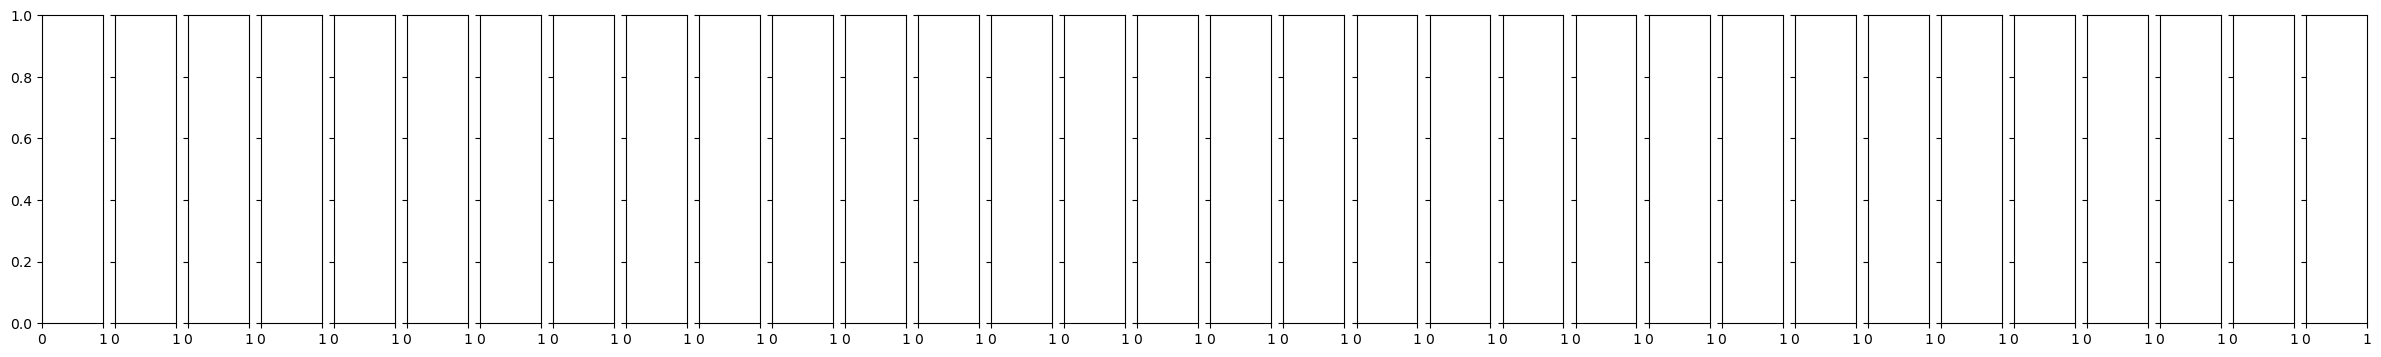

In [97]:
# Explicitly cast the values in each row to float before plotting
bio1_groups = merged_df.groupby('bio1')

# Set the number of columns for the plot grid
n_cols = len(bio1_groups)  # You can adjust this number based on your needs
n_rows = 1
# Create subplots with multiple columns

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 4 * n_rows), sharex=True, sharey=True)

# Flatten axes if we have multiple rows/columns
axes = axes.flatten()

# Plot each group of samples in a different subplot with color-filled areas
for i, (bio1, group) in enumerate(bio1_groups):
    # Plot each row (sample) in the group
    for _, row in group.iterrows():
        x = [1, 2, 3]
        y = row[['1', '2', '3']].astype(float).values  # Convert to float
        
        # Fill the area representing the alternative allele frequency
        axes[i].fill_between(x, 0, y, color=colors[0], alpha=0.2, label='Alt allele freq')
        
        # Fill the area representing the reference allele frequency
        axes[i].fill_between(x, y, 1, color=colors[1], alpha=0.2, label='Ref allele freq')
    
    # Set the title and labels for each subplot
    axes[i].set_title(f'{int(bio1)}')
    axes[i].set_xlabel('Gen')
    
    # For subplots other than the first, remove y-axis labels and ticks
    if i > 0:
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].set_xlabel('') 
        axes[i].tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
    
    # Remove all spines (rectangles around the plots)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(i == 0)  # Only show the left spine for the first plot

# Set y-axis label and ticks only for the first plot
axes[0].set_ylabel('Frequency')
plt.subplots_adjust(wspace=0, hspace=0)  # Shrink space between subplots
# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
bio1